# Part 1 of Links and Relationships: Drawing Basic Links

This page is primarily based on the following page at the Circos documentation site:



- [1. Drawing Basic Links](????????????)



That page is the first part of the ??? part ['Links and Relationships' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to the end of the previous section by clicking [here &#8592;](TickMarks_Part9.ipynb).



----



5 --- Links and Relationships
=============================

1. Drawing Basic Links
----------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/links/basic_links/lesson){.clean}]{.active}
[Images](/documentation/tutorials/links/basic_links/images){.normal}
[Configuration](/documentation/tutorials/links/basic_links/configuration){.normal}
:::

One of the core uses of Circos is to show the relationships between
positions on axes. Axes might be chromosomes and might indicate
translocations. Or the axes could be categories or entities (e.g.
countries) and indicate some relationship between them, such as
migration of people.

A lot of the syntax for defining parameters that control how links are
defined carry over directly from the syntax for highlights.

### [\<links\>]{.syn-block} block

All link data sets are defined within the [\<links\>]{.syn-block} block.
Typically this block contains global parameter settings in its root -
these values become the default values for all link data.

Individual link data sets are defined within [\<link\>]{.syn-block}
blocks.

```ini
<links>
```


```ini
# global parameters here
```


```ini
<link>
...
</link>
```


```ini
<link>
...
</link>
```


```ini
</links>
```


### data format

Link data files are composed of position pairs defined on one line.

```ini
...
hs1 100 200 hs2 250 300
hs1 400 550 hs3 500 750
hs1 600 800 hs4 150 350
...
```


#### two-line format

Links may also be defined across two lines. The lines are associated
together using a link `id`, which is unique for each pair. You must also
have exactly two lines for each link `id`.

```ini
...
segdup00010 hs1 100 200 
segdup00010 hs2 250 300
segdup00011 hs1 400 550
segdup00011 hs3 500 750
segdup00012 hs1 600 800
segdup00012 hs4 150 350
...
```


The two-line format is deprecated and may not be supported in future
versions.

#### link options

As with highlights, you can add an optional field to specify
link-specific options.

```ini
...
hs1 100 200 hs2 250 300 color=blue
hs1 400 550 hs3 500 750 color=red,thickness=5p
hs1 600 800 hs4 150 350 color=black
...
```


### example

In this example, I draw data from a file of coordinates defined by
segmental duplications. Each coordinate pair defines two regions of the
genome that are defined as segmental duplications (\>1kb in length,
\>90% similarity).

```ini
<links>
```


```ini
<link>
file          = data/5/segdup.txt
color         = black_a5
radius        = 0.95r
bezier_radius = 0.1r
thickness     = 1
</link>
```


```ini
</links>
```


#### links with custom karyotype files

If you need to draw links on segments for which the karyotype is not
available --- when the segments are not chromosomes from a common
species --- you\'ll need to [create your own karyotype
file](/documentation/tutorials/ideograms/karyotype).

For example, if you had 3 contigs of size 1000, 1500 and 2500 bp, you
might create this file

```ini
# karyotype.txt
chr - contig1 1 0 1000 black
chr - contig2 2 0 1500 blue
chr - contig3 3 0 2500 red
```


and in `circos.conf`{.syn-include} use

```ini
karyotype = karyotype.txt
```


Your link file might look like this

```ini
contig1 10 20 contig2 500 520 
contig3 50 80 contig3 750 760
...
```


Here the first link defines connections between `contig1:10-20` and
`contig2:500-520` and the second between `contig3:50-80` and
`contig3:750-760`.

#### link parameters

The basic parameters for links are

-   `radius` --- this is the radial position of the termination of the

```ini
link; for relative values, if `radius` \< 1 then it is defined in
terms of the inner ideogram radius, otherwise it is defined in terms
of the outer ideogram radius
```


-   `bezier_radius` --- the radial position of the third control point

```ini
(in addition to the two positions defined by the link coordinates)
used to draw the Bezier curve; if this parameter is not defined then
straight lines will be used
```


-   `color` --- color of the link line
-   `thickness` --- thickness of the link line (note that this is not

```ini
stroke\_thickness, since the line isn\'t technically stroked)
```


-   `record_limit` --- if this is defined, the number of records read

```ini
from the file is capped; coordinate records are sampled from the
start of the file; useful for debugging
```


### link defaults

All track types have default values. For links, these are

```ini
ribbon           = no
color            = black
thickness        = 1
radius           = 0.40r
bezier_radius    = 0r
crest                = 0.5
bezier_radius_purity = 0.75
```


and loaded from `etc/tracks/link.conf`{.syn-include} in the Circos
distribution. This file is set by the `track_defaults` parameter, which
is set normally in `etc/housekeeping.conf`{.syn-include}. You can
override defaults by setting the parameter to `undef`

```ini
<link>
...
crest = undef
...
</link>
```


or undefining `track_defaults`

```ini
<<include etc/housekeeping.conf>>
track_defaults* = undef
```


Note that the `*` syntax is required because you are overriding a
parameter which is already defined at the same level in the
configuration file.

### bezier curves

Links can be drawn as straight lines or as [quadratic Bezier
curves](http://en.wikipedia.org/wiki/B%C3%A9zier_curve).

For the latter, the start `p1` and end `p3` control points are defined
by the coordinate positions (angularly) and the radius parameter
(radially). The middle control point `p2` is defined by the mid point
between the coordinates (angularly) and `bezier_radius` parameter
(radially).

The Bezier curve is drawn to have its tangent at `p1` defined by the
line `p1-p2` and at `p3` defined by the line `p2-p3` (see the image
associated with this tutorial).




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/5/1/

/home/jovyan/circos-tutorials-0.67/tutorials/5/1


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.40s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.41s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/5/1
debuggroup summary 0.41s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.41s loading configuration from file circos.conf
debuggroup summary 0.41s found conf file circos.conf
debuggroup summary 0.56s debug will appear for these features: output,summary
debuggroup summary 0.56s bitmap output image ./circos.png
debuggroup summary 0.56s SVG output image ./circos.svg
debuggroup summary 0.56s parsing karyotype and organizing ideograms
debuggroup summary 0.65s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.65s applying global and local scaling
debuggroup summary 0.66s allocating image, colors and brushes
debuggroup summary 2.32s drawing 3 ideograms of total size 690,472,427
debuggroup summary 2.32s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

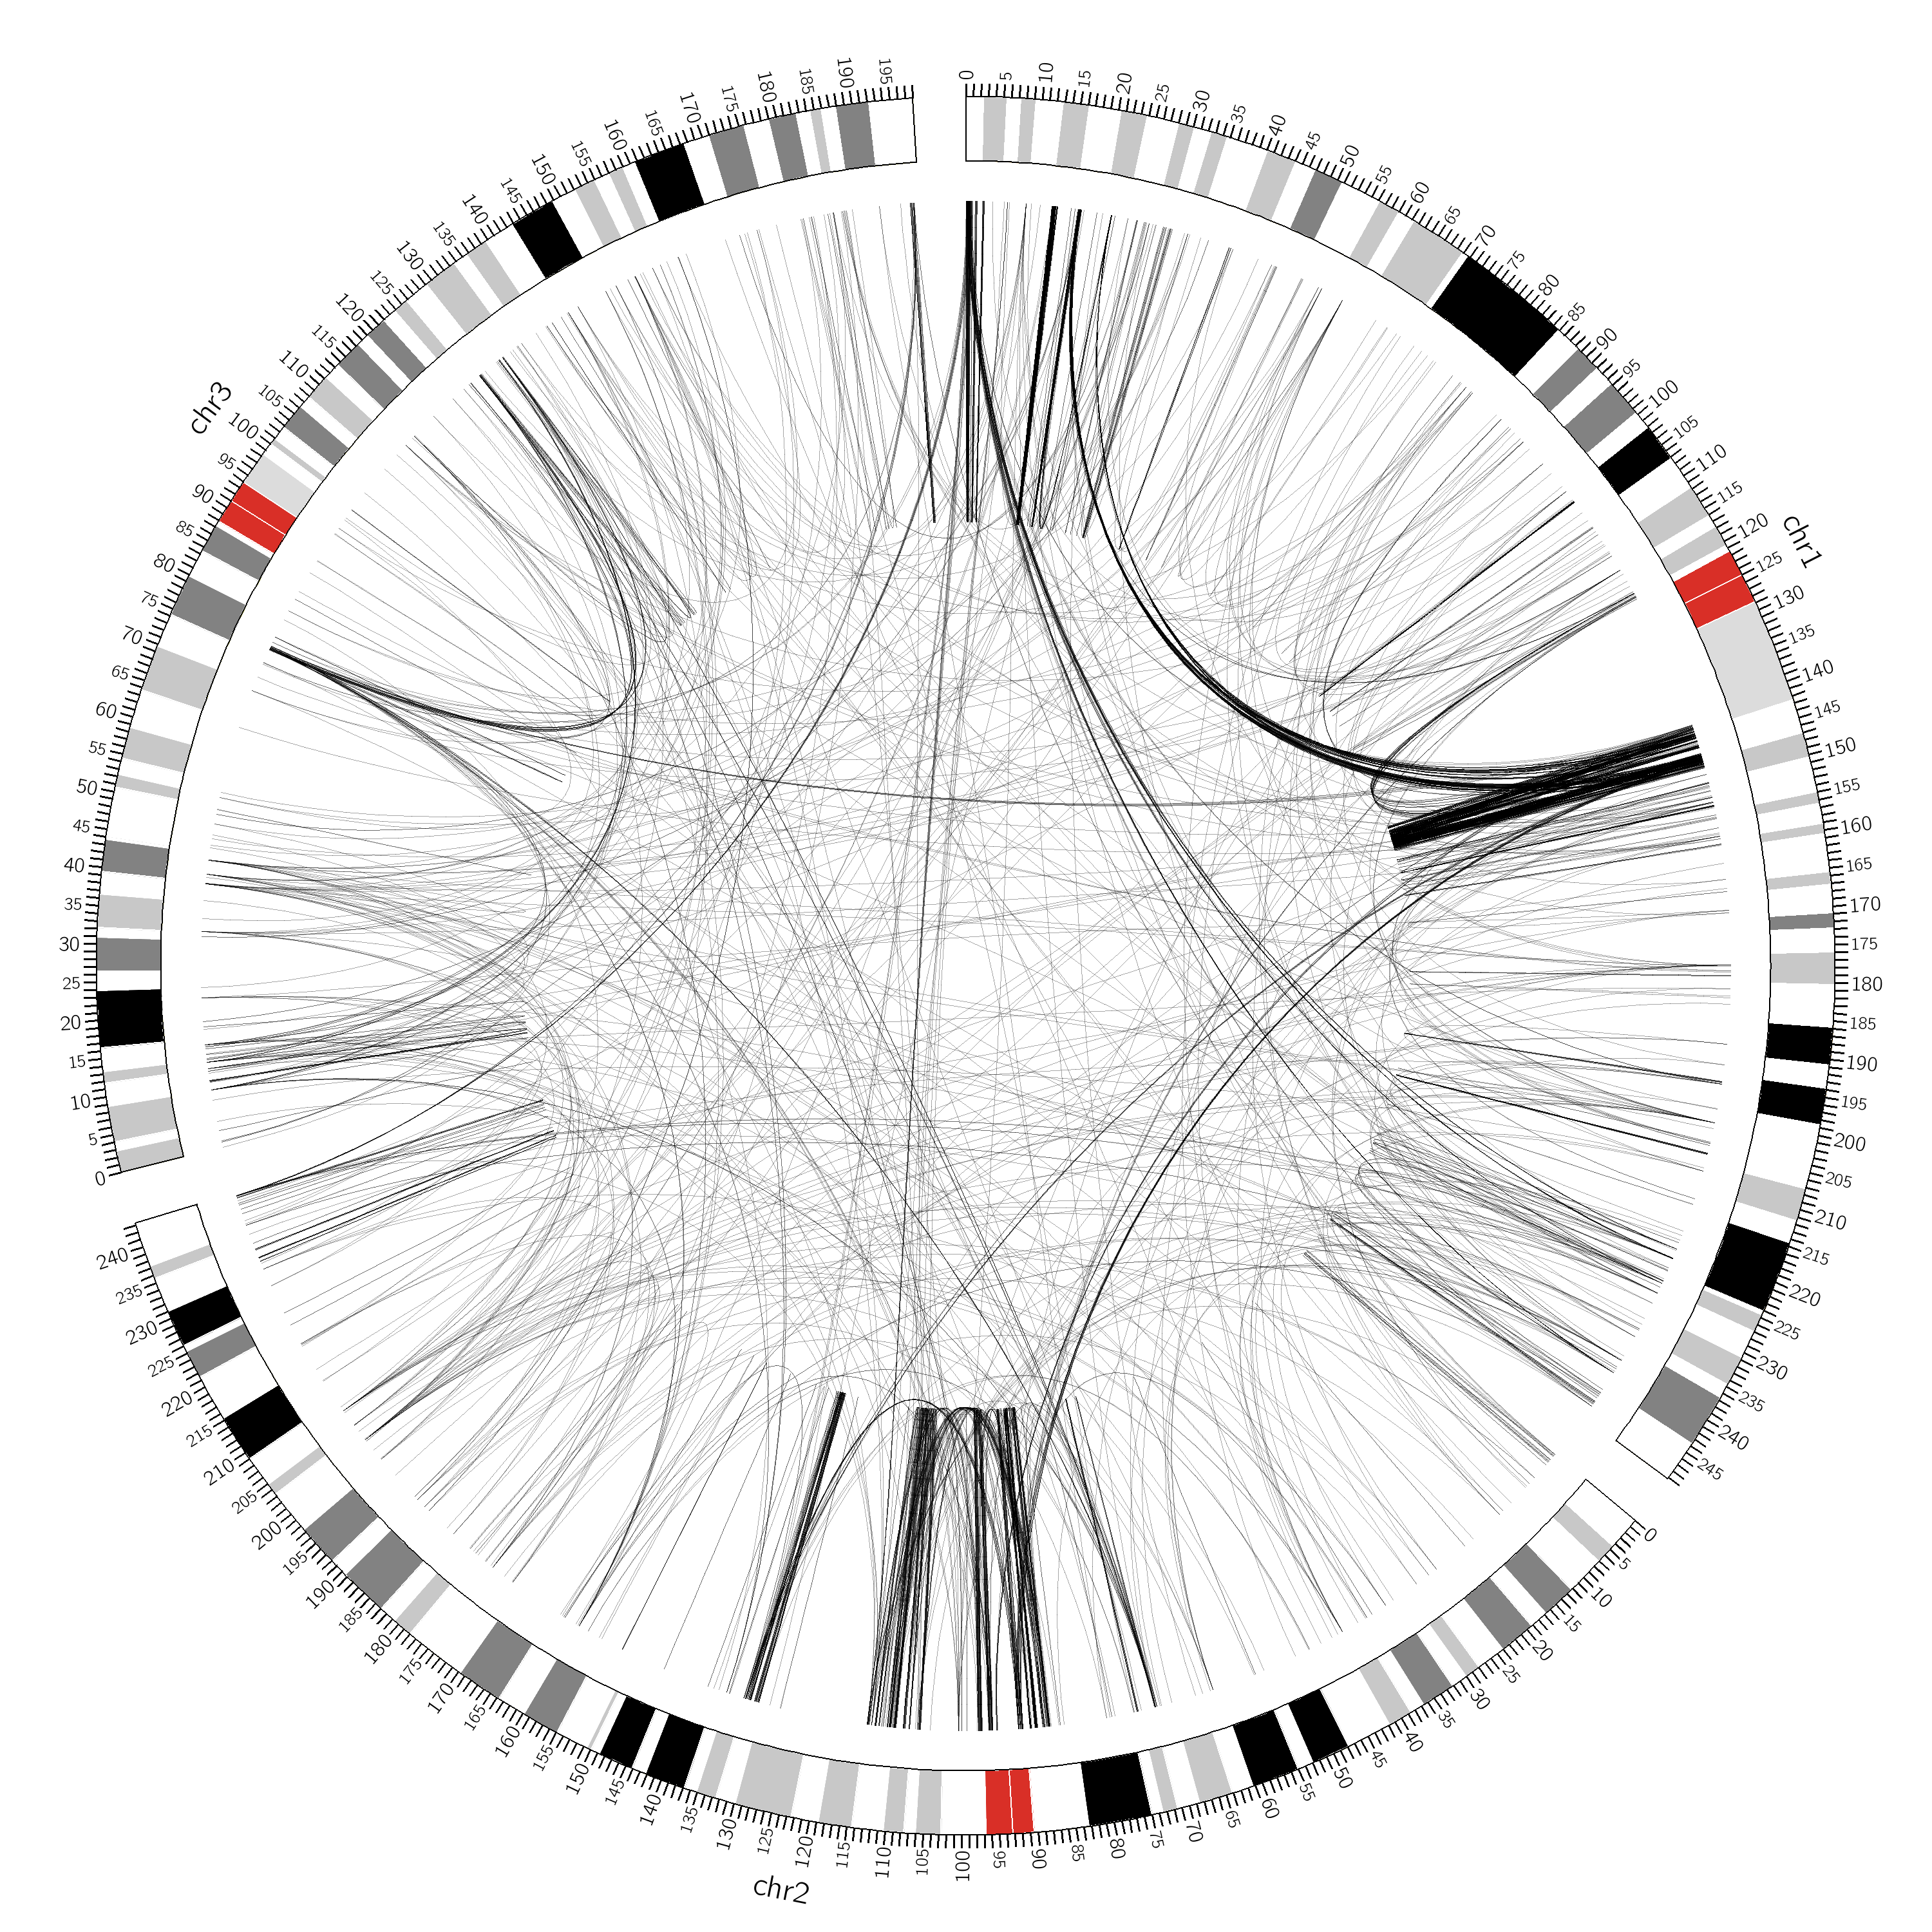

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Links and Relationships series by clicking [here &#10145;](Links_Part2.ipynb).

----